In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [297]:
#WE HAVE GIVEN A QUERY POINT(X) AND WE HAVE TO FINDOUT ITS CLASSIN WHICH IT BELONGS.ONLY 2 HERE MALE N FEMALE

In [298]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [299]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [300]:
X = dataset.iloc[:,[2,3]].values

In [301]:
y = dataset.iloc[:,4].values

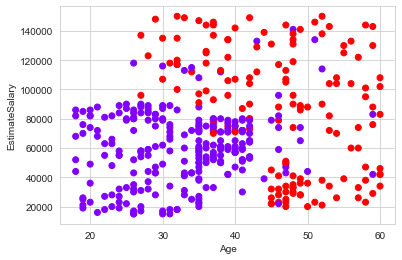

In [302]:
plt.scatter(dataset['Age'],dataset['EstimatedSalary'],c=dataset['Purchased'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.show()
#MALE=BLUE FEMALE-RED

In [303]:
from sklearn.model_selection import train_test_split

In [304]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [305]:
X_train.shape

(320, 2)

In [306]:
X_test.shape

(80, 2)

In [307]:
from sklearn.neighbors import KNeighborsClassifier

In [308]:
model = KNeighborsClassifier(n_neighbors=12)

In [309]:

model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [310]:
y_pred = model.predict(X_test)

In [311]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [312]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [313]:
from sklearn.metrics import confusion_matrix,classification_report

In [314]:
print(confusion_matrix(y_test,y_pred))

[[56  2]
 [ 7 15]]


In [315]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        58
           1       0.88      0.68      0.77        22

    accuracy                           0.89        80
   macro avg       0.89      0.82      0.85        80
weighted avg       0.89      0.89      0.88        80



In [316]:
X_test

array([[    30,  87000],
       [    38,  50000],
       [    35,  75000],
       [    30,  79000],
       [    35,  50000],
       [    27,  20000],
       [    31,  15000],
       [    36, 144000],
       [    18,  68000],
       [    47,  43000],
       [    30,  49000],
       [    28,  55000],
       [    37,  55000],
       [    39,  77000],
       [    20,  86000],
       [    32, 117000],
       [    37,  77000],
       [    19,  85000],
       [    55, 130000],
       [    35,  22000],
       [    35,  47000],
       [    47, 144000],
       [    41,  51000],
       [    47, 105000],
       [    23,  28000],
       [    49, 141000],
       [    28,  87000],
       [    29,  80000],
       [    37,  62000],
       [    32,  86000],
       [    21,  88000],
       [    37,  79000],
       [    57,  60000],
       [    37,  53000],
       [    24,  58000],
       [    18,  52000],
       [    22,  81000],
       [    34,  43000],
       [    31,  34000],
       [    49,  36000],


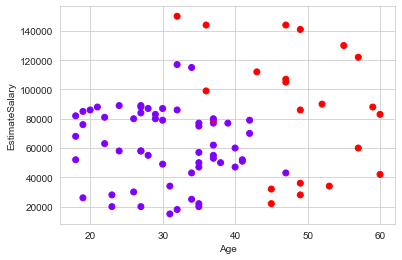

In [317]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.show()

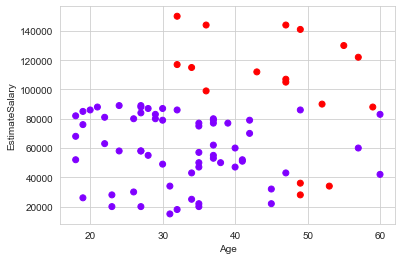

In [318]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('EstimateSalary')
plt.show()

In [319]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

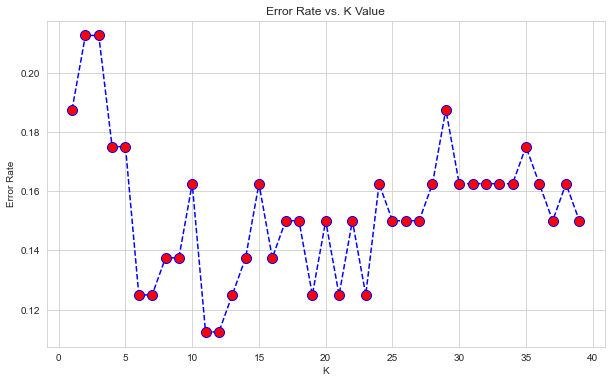

In [320]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [321]:
#LOWEST ERROR IS BETWEEN 10-15 SO SELECT K VALUE BETWEEN 10-15 I.E 11,12 WE HAVE 89% ACCURACY